In [1]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import pylast
import spotipy
import seaborn as sns
from __future__ import division
from ast import literal_eval
from collections import Counter
from spotipy.oauth2 import SpotifyClientCredentials

%matplotlib inline

#  Authentication

In [2]:
API_KEY = "8a564e0a10ada2dae369a5b6ee8ea87d"
API_SECRET = "d3a685cfca018de96861622c8e3bfdd8"
network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET)

In [ ]:
client_credentials_manager = (SpotifyClientCredentials(client_id='944c05ffa8d2479aa6bc25e0b522b8db', 
                                                       client_secret='55848e78225c4b8798d306fc17324719'))
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)     

#  Genre data

In [145]:
stefan_top_tracks = pd.read_csv('stefan_top_songs.csv', index_col = 0)

stefan_top50_tracks = []
for track in stefan_top_tracks['track_uri']:
    results = sp.track(track)
    track_name = results['name']
    artist_name = results['artists'][0]['name']
    stefan_top50_tracks.append([track_name, artist_name])

stefan_top50_tags = []
for track in stefan_top50_tracks:
    try:
        tag = network.get_artist(track[1]).get_top_tags()
        stefan_top50_tags.append(tag[0].item.get_name())
    except:
        print('The artist "' + str(track[1]) + '" could not be found.')

In [150]:
stefan_tracks = pd.read_csv('stefan_music.csv', index_col = 0)

stefan_all_tags = []
for index in range(len(stefan_tracks)):
    artist = literal_eval(stefan_tracks.loc[index, 'artists'])[0]
    try:
        tag = network.get_artist(artist).get_top_tags()
        stefan_all_tags.append(tag[0].item.get_name())
    except:
        print('The artist "' + str(artist) + '" could not be found.')

kelsey_tracks = pd.read_csv('kelsey_music.csv', index_col = 0)

kelsey_all_tags = []
for index in range(len(kelsey_tracks)):
    artist = literal_eval(kelsey_tracks.loc[index, 'artists'])[0]
    try:
        tag = network.get_artist(artist).get_top_tags()
        kelsey_all_tags.append(tag[0].item.get_name())
    except:
        print('The artist "' + str(artist) + '" could not be found.')

The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist "Alina Baraz" could not be found.
The artist

In [228]:
stefan_top_tags = []
temp = Counter(stefan_all_tags)
for item in temp.most_common(10):
    tag_data = {}
    tag = item[0]
    pct = item[1] / sum(temp.values())
    tag_data['Genre'] = tag.capitalize()
    tag_data['% of Songs'] = pct
    stefan_top_tags.append(tag_data)
    
kelsey_top_tags = []
temp = Counter(kelsey_all_tags)
for item in temp.most_common(10):
    tag_data = {}
    tag = item[0]
    pct = item[1] / sum(temp.values())
    tag_data['Genre'] = tag.capitalize()
    tag_data['% of Songs'] = pct
    kelsey_top_tags.append(tag_data)

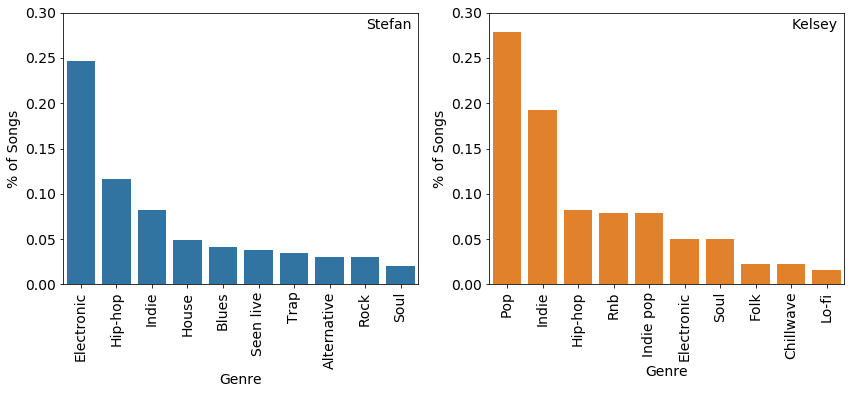

In [229]:
stefan_top_tags_df = pd.DataFrame(stefan_top_tags)
kelsey_top_tags_df = pd.DataFrame(kelsey_top_tags)

fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x='Genre', y='% of Songs', data=stefan_top_tags_df, color=sns.color_palette()[0])
ax1.set_ylabel('% of Songs')
ax1.set_xlabel('Genre')
ax1.set_ylim(0,0.3)
ax1.annotate('Stefan', 
                    xy = (1,1),
                    xytext=(0.98, 0.98),
                    xycoords='axes fraction',
                    textcoords='axes fraction',
                    horizontalalignment='right',
                    verticalalignment='top',
                    fontsize='14')
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(x='Genre', y='% of Songs', data=kelsey_top_tags_df, color=sns.color_palette()[1])
ax2.set_ylabel('% of Songs')
ax2.set_xlabel('Genre')
ax2.set_ylim(0,0.3)
ax2.annotate('Kelsey', 
                    xy = (1,1),
                    xytext=(0.98, 0.98),
                    xycoords='axes fraction',
                    textcoords='axes fraction',
                    horizontalalignment='right',
                    verticalalignment='top',
                    fontsize='14')
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);

plt.rcParams["axes.labelsize"] = 14
for ax in plt.gcf().axes:
    ax.tick_params(labelsize=14)

#  Popularity

In [247]:
stefan_popularity = []
for index in range(len(stefan_tracks)):
    artist = literal_eval(stefan_tracks.loc[index, 'artists'])[0]
    song_name = stefan_tracks.loc[index, 'name']
    spotify_popularity = stefan_tracks.loc[index, 'popularity']
    try: 
        lastfm_popularity = network.get_track(artist, song_name).get_playcount()
        stefan_popularity.append([artist, song_name, spotify_popularity, lastfm_popularity])
    except:
        print("Couldn't get LastFM popularity for " + str(song_name) + '.')

Couldn't get LastFM popularity for Closer.
Couldn't get LastFM popularity for Vanity Fair (feat. Melinda Ortner).
Couldn't get LastFM popularity for goosebumps.
Couldn't get LastFM popularity for Antidote.
Couldn't get LastFM popularity for Are You Still Certain? (feat. Mashrou' Leila).


In [263]:
kelsey_popularity = []
for index in range(len(kelsey_tracks)):
    artist = literal_eval(kelsey_tracks.loc[index, 'artists'])[0]
    song_name = kelsey_tracks.loc[index, 'name']
    spotify_popularity = kelsey_tracks.loc[index, 'popularity']
    try: 
        lastfm_popularity = network.get_track(artist, song_name).get_playcount()
        kelsey_popularity.append([artist, song_name, spotify_popularity, lastfm_popularity])
    except:
        print("Couldn't get LastFM popularity for " + str(song_name) + '.')

Couldn't get LastFM popularity for Kiss'n in the Dark.
Couldn't get LastFM popularity for Sativa.
Couldn't get LastFM popularity for While We're Young.
Couldn't get LastFM popularity for Hello Ego.
Couldn't get LastFM popularity for Moments.
Couldn't get LastFM popularity for OLLA (Only Lovers Left Alive).


In [252]:
popularity_comparison = []
for item in stefan_popularity:
    popularity_data = {}
    popularity_data['spotify_popularity'] = item[2]
    popularity_data['lastfm_popularity'] = item[3]
    popularity_comparison.append(popularity_data)

(0, 5000000)

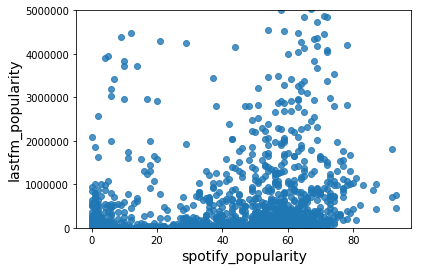

In [278]:
popularity_comparison_df = pd.DataFrame(popularity_comparison)

ax = sns.regplot(x='spotify_popularity', y='lastfm_popularity', data=popularity_comparison_df, fit_reg=False)
ax.set_ylim(0,5000000)

In [293]:
count = 0
for item in stefan_popularity:
    count += item[3]
print("The mean popularity of Stefan's songs are: %s" % (str(round(count / len(stefan_popularity), -2))))

count = 0
for item in kelsey_popularity:
    count += item[3]
print("The mean popularity of Kelsey's songs are: %s" % (str(round(count / len(kelsey_popularity), -2))))

The mean popularity of Stefan's songs are: 784700.0
The mean popularity of Kelsey's songs are: 1046000.0


In [322]:
stefan_pop = []
for item in stefan_popularity:
    if item[3] < 5e6:
        stefan_pop.append(item[3])
        
kelsey_pop = []
for item in kelsey_popularity:
    if item[3] < 5e6:
        kelsey_pop.append(item[3])

In [339]:
count = 0
for item in stefan_pop:
    if item <= 5e4:
        count+=1

count/len(stefan_pop)

0.3163884673748103

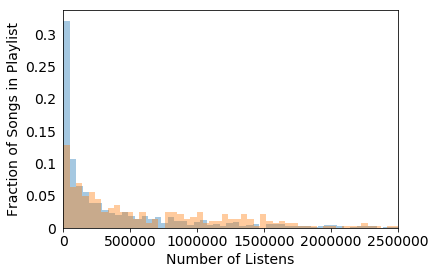

In [341]:
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(stefan_pop, bins=100, kde=False, rug=False, ax=ax, norm_hist=True, kde_kws={'clip': [0, 1.4e7]})
sns.distplot(kelsey_pop, bins=100, kde=False, rug=False, ax=ax, norm_hist=True, kde_kws={'clip': [0, 1.4e7]})
ax.set_xlim(0,2.5e6)
plt.tick_params(axis='y', which='both', left='off')
ax.yaxis.set_ticklabels([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])

ax.set_xlabel('Number of Listens')
ax.set_ylabel('Fraction of Songs in Playlist')

for ax in plt.gcf().axes:
    ax.tick_params(labelsize=14)

# Top 50

In [3]:
top50_df = pd.read_csv('top50.csv', index_col=0)

In [5]:
top50_all_tags = []
for index in range(len(top50_df)):
    artist = literal_eval(top50_df.loc[index, 'artists'])[0]
    try:
        tag = network.get_artist(artist).get_top_tags()
        top50_all_tags.append(tag[0].item.get_name())
    except:
        print('The artist "' + str(artist) + '" could not be found.')

In [22]:
top50_df['lastfm_genre'] = top50_all_tags
top50_df.to_csv('top50.csv')

In [10]:
stefan_tracks = pd.read_csv('stefan_music.csv', index_col = 0)

stefan_top_tags = []
temp = Counter(stefan_tracks['lastfm_genre'])
for item in temp.most_common(10):
    tag_data = {}
    tag = item[0]
    pct = item[1] / sum(temp.values())
    tag_data['Genre'] = tag.capitalize()
    tag_data['% of Songs'] = pct
    stefan_top_tags.append(tag_data)
    
top50_top_tags = []
temp = Counter(top50_all_tags)
for item in temp.most_common(10):
    tag_data = {}
    tag = item[0]
    pct = item[1] / sum(temp.values())
    tag_data['Genre'] = tag.capitalize()
    tag_data['% of Songs'] = pct
    top50_top_tags.append(tag_data)

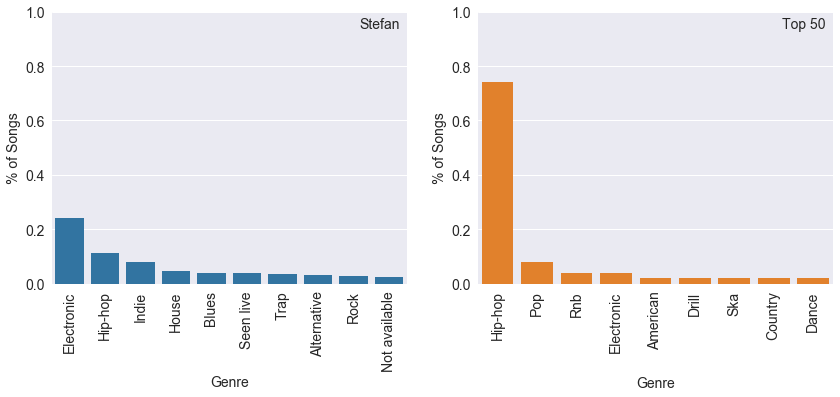

In [19]:
stefan_top_tags_df = pd.DataFrame(stefan_top_tags)
top50_top_tags_df = pd.DataFrame(top50_top_tags)

sns.set()
sns.set_palette("tab10")
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax1 = sns.barplot(x='Genre', y='% of Songs', data=stefan_top_tags_df, color=sns.color_palette()[0])
ax1.set_ylabel('% of Songs', fontsize=14)
ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylim(0,1)
ax1.annotate('Stefan', 
                    xy = (1,1),
                    xytext=(0.98, 0.98),
                    xycoords='axes fraction',
                    textcoords='axes fraction',
                    horizontalalignment='right',
                    verticalalignment='top',
                    fontsize='14')
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);
ax2 = fig.add_subplot(122)
ax2 = sns.barplot(x='Genre', y='% of Songs', data=top50_top_tags_df, color=sns.color_palette()[1])
ax2.set_ylabel('% of Songs', fontsize=14)
ax2.set_xlabel('Genre', fontsize=14, labelpad=24)
ax2.set_ylim(0,1)
ax2.annotate('Top 50', 
                    xy = (1,1),
                    xytext=(0.98, 0.98),
                    xycoords='axes fraction',
                    textcoords='axes fraction',
                    horizontalalignment='right',
                    verticalalignment='top',
                    fontsize='14')
locs, labels = plt.xticks();
plt.setp(labels, rotation=90);

plt.rcParams["axes.labelsize"] = 14
for ax in plt.gcf().axes:
    ax.tick_params(labelsize=14)
plt.savefig('svstop50_lastfm_genre.eps', dpi=200, format='eps')

# Top 2017

In [23]:
top2017_df = pd.read_csv('top2017.csv', index_col=0)

In [24]:
top2017_all_tags = []
for index in range(len(top2017_df)):
    artist = literal_eval(top2017_df.loc[index, 'artists'])[0]
    try:
        tag = network.get_artist(artist).get_top_tags()
        top2017_all_tags.append(tag[0].item.get_name())
    except:
        print('The artist "' + str(artist) + '" could not be found.')

In [25]:
top2017_df['lastfm_genre'] = top2017_all_tags
top2017_df.to_csv('top2017.csv')

#  Test code

In [ ]:
tags = network.get_artist('Mura Masa').get_top_tags()
tracks = network.get_artist('Mura Masa').get_top_tracks(limit=5)
tags[0].item.get_name(), tags[0].weight
tracks[0].item.get_name()

In [342]:
results = network.get_track('Mura Masa', 'Firefly')

In [346]:
help(pylast.Track)

Help on class Track in module pylast:

class Track(_Opus)
 |  A Last.fm track.
 |  
 |  Method resolution order:
 |      Track
 |      _Opus
 |      _BaseObject
 |      _Taggable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __hash__(self)
 |      Return hash(self).
 |  
 |  __init__(self, artist, title, network, username=None)
 |      Create an opus instance.
 |      # Parameters:
 |          * artist: An artist name or an Artist object.
 |          * title: The album or track title.
 |          * ws_prefix: 'album' or 'track'
 |  
 |  get_album(self)
 |      Returns the album object of this track.
 |  
 |  get_correction(self)
 |      Returns the corrected track name.
 |  
 |  get_duration(self)
 |      Returns the track duration.
 |  
 |  get_similar(self, limit=None)
 |      Returns similar tracks for this track on the network,
 |      based on listening data.
 |  
 |  get_url(self, domain_name=0)
 |      Returns the URL of the album or track page on the network.
